In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

###Introduction:
Our project focuses on the relationship between the mental health status of low-income parents and behavioral and educational outcomes of their children. We use the Fragile Families dataset, a longitudinal study of children born in 20 large cities across the United States, to study how symptoms of depression of mothers living in poverty affects GPA and grit of their children. While there is ample research linking poverty to poor educational outcomes, we were curious about the interactions between poverty and depression in parents, and to what extent that particular hardship manifests in children.  

###Fragile Families Dataset:
The Fragile Families and Child Wellbeing Study follows a cohort of 4,242 children born between 1988 and 2000 in a large US city. "Fragile" families are those with unmarried parents. The term serves to underscore that such familes are at greater risk of breaking up and living in poverty. Data was collected in six waves, when children were born and then again at ages 1, 3, 5, 9, and 15. The dataset contains 12,943 features for each child.

###Preprocessing:
Our first challenge was deciding which subset of the data to analyze. There are dozens of variables on mental health, including questions about depression, anxiety, counseling, and alcohol and drug use. Ultimately, we chose to use professional rather than self-reported diagnoses. For each collection wave, parents were evaluated on both a conservative and liberal scale for depression and anxiety. We chose to include conservative and liberal metrics in our analysis to observe any significant differences between the effects of mild versus severe symptoms in parents on educational and behavioral outcomes in children. Given the large scope of the study, however, we chose to exlude anxiety and restrict our analysis to depression only. We also restricted our investigation of depression in parents to depression in mothers because the raw data included a variable for "lives with mother", which allowed us to exclude foster youth from analysis. We further restricted our sample to diagnoses in the first year of the study; however we included an interaction term for Year 1 and Year 9 (the last year of mental health evaluations) to account for differential effects for more- or less-persistent depression. Thus, our primary variables of interest are: 1) depression status year 1 (liberal), 2) depression status year 1 (conservative), 3) depression status year 1 * year 9 (liberal), 4) depression status year 1 * year 9 (conservative). 

After selecting our primary variables of interest, we chose control variables. We included household income (average across six waves), race, age, and education level of the mother, and sex of the child. 

After selecting our features, we converted categorical variables (e.g., race, education) to dummy variables, and imputed missing data using averages. To impute binary variables, we rounded means to 0 or 1.

Our outcome variables are grit and GPA. Grit is a positive, non-cognitive trait that measures perserverance and passion. It's a continuous variable from one to five (http://www.sjdm.org/dmidi/files/Grit-8-item.pdf), captured in the dataset as a float from 0-4. GPA is also a continuous varible; it ranges from one to four. 

###Analysis & Results:
Both of our outcome variables are continuous, which allowed us to perform regression and classification analyses. Ultimately, we implemented three regression models (linear regression, random forest regression, and k-nearest neighbors regression). We also implemented three classification models (logistic regression, naive Bayes classification, and random forest classification). We also attempted to implement a support vector machine classifier, but excessive running time made the model impractical.

The classification models far outperformed the regression models. Among the regression models, KNN performed the best and returned an R-squared value of -.22 for GPA and -.25 for grit. The other models had minimal predictive value. Among the classification models, the logistic regression and naive Bayes models performed equally well. They yielded an accuracy score of .73-.74 for GPA and .81-.82 for grit. The random forest classifier yielded an accuracy rate of .63-.64 for GPA and .80-.81 for grit. This pattern held across all models: each were better at predicting grit rather than GPA. This suggests that our feature variables correlate more highly with grit than GPA.

Although the random forest classifier doesn't have the predictive value of the other classifier, it's useful because it reveals the relative importance of the features. In particular, it reveals that household income and age were highly predictive and accounted for nearly all of the predictive power of the model. This suggests that while our models are predictive of grit and GPA overall, they are insufficient to study the connections between mental health of parents and educational and behavioral outcomes in children.  

Lastly, there weren't significant differences between the predictive power of models with conservative mental health metrics versus liberal mental health metrics.

###Limitations:
This analysis had several limitations. First, in an attempt to simplify it, we included only mental health data from year 1 and year 9. As a result, lots of valuable data was lost. A future analysis should include mental health indicators from each wave and implement a more sophisticated time series analysis. Second, the data contains information about therapy and counseling parents received; these features should be incorporated into future analyses.

The dataset itself also had limitations. For example, GPA and grit were recorded only once over the roughly 15-year period. This made it difficult to detect how changes in the mental health status of parents affects changes in educational and behavioral outcomes of their children.

###Conclusion:
Disentangling the effects of poverty and poor mental health is difficult but important to study, particularly when considering the tradeoffs of various policy interventions in the face of budgetary constraints. Although this analysis didn't surface any significant effects, we hope that future work can more clearly illuminate the effects of depression on households in poverty and how those effects are transmitted to school age children.

In [3]:
data = pd.read_csv('background.csv')
y_train = pd.read_csv('train.csv')

/Users/richardwang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10025,10029,10032,10575,10578,10592,10607,10616,10631,10640,10655,10693,10712,10716,10740,10782,10787,10791,10796,10833,10865,10999,11030,11043,11127,11128,11234,11258,11282,11309,11310,11384,11394,11408,11409,11411,11412,11438,11441,11485,11490,11504,11508,11511,11514,11520,11527,11533,11539,11545,11546,11624,11629,11658,11672,11673,11678,11679,11680,11719,11721,11934,12160,12166,12168,12177,12183,12189,12199,12201,12203,12205,12216,12217,12228,12229,12239,12300,12316,12358,12367,12375,12402,12404,12408,12451,12453,12465,12467,12475,12481,12483,12496,12498,12520,12530,12531,12541,12599,12607,12623,12638,12650,12651,12663,12668,12715,12717,12735,12736,12758,12762,12772,12781,12788,12800,12801) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#features preprocessing

#create average income column
data['income'] = data[['cm1hhinc', 'cm2hhinc', 'cm3hhinc', 
                       'cm4hhinc', 'cf1hhinc', 'cf2hhinc', 
                       'cf3hhinc', 'cf4hhinc']].mean(axis=1)

#remove irrelevant inputs
cols = ['m1a11a', 'income', 'cm1age', 'cm1bsex', 'cm1ethrace', 
        'm1h3a', 'cm1edu', 'cm2md_case_con', 'cm2md_case_lib', 
        'cm5md_case_con', 'cm5md_case_lib', 'challengeID']

data = data.loc[:, cols]

#drop observations where child not with mother
data = data.loc[data.m1a11a==1].reindex()

#rename columns
data.rename(columns = {'m1a11a':'live_w_m','cm1ethrace':'race','cm1edu':'edu',
                       'cm1age':'age','cm1bsex':'baby_gender',
                       'cm2md_case_con':'mh_1_con','cm2md_case_lib':'mh_1_lib',
                       'cm5md_case_con':'mh_9_con','cm5md_case_lib':'mh_9_lib'}, 
                       inplace = True)

#convert "missing in wave" and "missing" to nan
for col in ['mh_1_con','mh_1_lib', 'mh_9_con','mh_9_lib',
            'edu', 'race', 'hispanic']:
    data = data.replace({col: {-9:np.nan, -3:np.nan}})
    
#impute, using rounded mean
data = data.fillna(data.mean().round())

#convert gender and hispanic to binary variables 
data = data.replace({'baby_gender': {2:0}})#male=0, female=1

#Convert education from categories to dummies
data_edu = pd.get_dummies(data['edu'])
data = pd.concat([data, data_edu], axis=1)
data.rename(columns = {1.0:'<hs',2.0:'hs',3.0:'some_coll',4.0:'coll_or_grad'}, 
                       inplace = True)
data = data.drop(['edu'], axis=1)

#Convert race from categories to dummies
data_race = pd.get_dummies(data['race'])
data = pd.concat([data, data_race], axis=1)
data.rename(columns = {1.0:'white',2.0:'black',3.0:'hispanic',4.0:'other'}, 
                       inplace = True)
data = data.drop(['race'], axis=1)

#Create interaction terms for mental health variables
data['m1_mh9_con'] = data['mh_1_con']*data['mh_9_con']
data['m1_mh9_lib'] = data['mh_1_lib']*data['mh_9_lib']
data = data.drop(['mh_9_con','mh_9_lib'], axis=1)

In [5]:
#outcomes preprocessing

#drop irrelevant column outputs
y_train = y_train.loc[:, ['gpa', 'grit', 'challengeID']]

#data imputation, using the mean
y_train = y_train.fillna(y_train.mean())

#create bins
def gpa_bins(x):
    if 0 <= x <= 1:
        return 'D'
    elif 1 < x <= 2:
        return 'C'
    elif 2 < x <= 3:
        return 'B'
    return 'A'

def grit_bins(x):
    if 0 <= x <= 1:
        return 'very low'
    elif 1 < x <= 2:
        return 'low'
    elif 2 < x <= 3:
        return 'average'
    return 'high'

y_train['gpa_cat'] = y_train['gpa'].apply(gpa_bins)
y_train['grit_cat'] = y_train['grit'].apply(grit_bins)

#merge training / testing 
data = pd.merge(data, y_train, on = 'challengeID').drop(['challengeID', 'live_w_m'], axis=1)

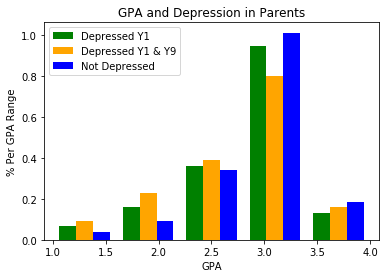

In [6]:
# Histogram of GPA values for those who meet depression criteria and for those who don't
gpa_d1 = data[data.mh_1_lib == 1]
gpa_d1 = gpa_d1['gpa']

gpa_d2 = data[data.m1_mh9_lib == 1]
gpa_d2 = gpa_d2['gpa']

gpa_nd = data[data.mh_1_lib == 0]
gpa_nd = gpa_nd['gpa']


plt.hist([gpa_d1, gpa_d2, gpa_nd], bins=5, density=True, color=['green','orange', 'blue'],
         label=['Depressed Y1', 'Depressed Y1 & Y9', 'Not Depressed'])
plt.xlabel('GPA')
plt.ylabel('% Per GPA Range')
plt.title('GPA and Depression in Parents')
plt.legend()

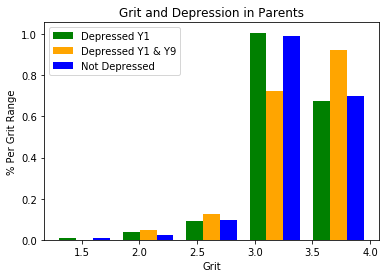

In [7]:
# Histogram of GPA values for those who meet depression criteria and for those who don't
grit_d1 = data[data.mh_1_lib == 1]
grit_d1 = grit_d1['grit']

grit_d2 = data[data.m1_mh9_lib == 1]
grit_d2 = grit_d2['grit']

grit_nd = data[data.mh_1_lib == 0]
grit_nd = grit_nd['grit']


plt.hist([grit_d1, grit_d2, grit_nd], bins=5, density=True, color=['green','orange', 'blue'],
         label=['Depressed Y1', 'Depressed Y1 & Y9', 'Not Depressed'])
plt.xlabel('Grit')
plt.ylabel('% Per Grit Range')
plt.title('Grit and Depression in Parents')
plt.legend()

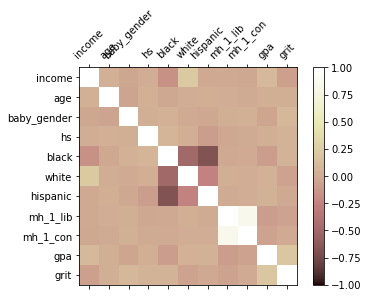

In [13]:
# Correlation plot of controls, feature variables, and target variables

data_subset = data[['income', 'age', 'baby_gender', 'hs','black', 'white', 'hispanic','mh_1_lib', 'mh_1_con', 'gpa', 'grit']]

corr = data_subset.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.colorbar(ax.matshow(corr, cmap='pink', vmin=-1, vmax=1))

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)


plt.show()


In [9]:
#split training / testing data (regression models)
features_subset_con = ['income','age','baby_gender','mh_1_con',
                       'm1_mh9_con','<hs','hs','some_coll',
                       'coll_or_grad','white','black','hispanic',
                       'other']

features_subset_lib = ['income','age','baby_gender','mh_1_lib',
                       'm1_mh9_lib','<hs','hs','some_coll',
                       'coll_or_grad','white','black','hispanic',
                       'other']

#dataset 1: outcome variable = gpa; mental health metric = liberal; continuous 
x_train1, x_test1, y_train1, y_test1 = train_test_split(data[features_subset_lib], data[['gpa']], 
                                                    test_size=0.2, random_state=42)

#dataset 2: outcome = gpa; mental health metric = conservative; continuous
x_train2, x_test2, y_train2, y_test2 = train_test_split(data[features_subset_con], data[['gpa']], 
                                                    test_size=0.2, random_state=42)

#dataset 3: outcome = grit; mental health metric = liberal; continuous 
x_train3, x_test3, y_train3, y_test3 = train_test_split(data[features_subset_lib], data[['grit']], 
                                                    test_size=0.2, random_state=42)

#dataset 4: outcome = grit; mental health metric = conservative; continuous 
x_train4, x_test4, y_train4, y_test4 = train_test_split(data[features_subset_con], data[['grit']], 
                                                    test_size=0.2, random_state=42)

#dataset 5: outcome variable = gpa; mental health metric = liberal; categorical 
x_train1_cat, x_test1_cat, y_train1_cat, y_test1_cat = train_test_split(data[features_subset_lib], data[['gpa_cat']], 
                                                    test_size=0.2, random_state=42)

#dataset 6: outcome = gpa; mental health metric = conservative; categorical
x_train2_cat, x_test2_cat, y_train2_cat, y_test2_cat = train_test_split(data[features_subset_con], data[['gpa_cat']], 
                                                    test_size=0.2, random_state=42)

#dataset 7: outcome = grit; mental health metric = liberal; categorical 
x_train3_cat, x_test3_cat, y_train3_cat, y_test3_cat = train_test_split(data[features_subset_lib], data[['grit_cat']], 
                                                    test_size=0.2, random_state=42)

#dataset 8: outcome = grit; mental health metric = conservative; categorical 
x_train4_cat, x_test4_cat, y_train4_cat, y_test4_cat = train_test_split(data[features_subset_con], data[['grit_cat']], 
                                                    test_size=0.2, random_state=42)


In [39]:
#linear regression models 

def linear_model (xtrain, ytrain, xtest, ytest): 
    model = LinearRegression()
    model.fit(xtrain,ytrain)
    print('r^2:', model.score(xtest,ytest))
    print('coefficients:', model.coef_)
    print('intercept:', model.intercept_)

#dataset 1: gpa, liberal 
linear_model (x_train1, y_train1, x_test1, y_test1)

#dataset 2: gpa, conservative
linear_model (x_train2, y_train2, x_test2, y_test2)

#dataset 3: grit, liberal 
linear_model (x_train3, y_train3, x_test3, y_test3)

#dataset 4: grit, conservative
linear_model (x_train4, y_train4, x_test4, y_test4)

r^2: 0.0026253752803944153
coefficients: [[ 1.51598717e-06  2.03794764e-03 -2.41187110e-02 -1.09536429e-01
  -3.24953556e-02 -7.77027408e-02  5.06303474e-03  7.75106766e-02
  -4.87097055e-03  3.13978577e-03 -6.97903345e-02  2.47727530e-02
   4.18777957e-02]]
intercept: [2.81272511]
r^2: -0.0016688840610215028
coefficients: [[ 1.52121329e-06  1.93549150e-03 -2.23016351e-02 -3.67025224e-02
  -1.88700366e-01 -7.99354131e-02  5.38749203e-03  7.60957165e-02
  -1.54779551e-03 -6.66129724e-04 -6.80676249e-02  2.46504093e-02
   4.40833453e-02]]
intercept: [2.80463823]
r^2: -0.01864687760911976
coefficients: [[-1.74199586e-06  3.60903224e-03  8.63881515e-02 -6.62802430e-02
   1.66192863e-02  1.80473590e-02  4.49093082e-02  6.56679480e-03
  -6.95234620e-02 -2.17896858e-02  2.69475070e-02  2.04875479e-02
  -2.56453691e-02]]
intercept: [3.3199224]
r^2: -0.018730908703333826
coefficients: [[-1.73221669e-06  3.52768405e-03  8.66384523e-02 -2.04718712e-02
   6.93525899e-03  1.68888784e-02  4.53569858

In [40]:
#random forest regression 

def forest_model (xtrain, ytrain, xtest, ytest):
    model = RandomForestRegressor(max_depth=3, random_state=0,
                               n_estimators=10)
    model.fit(xtrain, np.ravel(ytrain))
    print('accuracy score:', model.score(xtest, ytest))
    print('feature importance:', model.feature_importances_)
    print(model.estimators_)

#dataset 1: gpa, liberal 
forest_model(x_train1, y_train1, x_test1, y_test1)

#dataset 2: gpa, conservative
forest_model(x_train2, y_train2, x_test2, y_test2)

#dataset 3: grit, liberal 
forest_model(x_train3, y_train3, x_test3, y_test3)

#dataset 4: grit, conservative
forest_model(x_train4, y_train4, x_test4, y_test4)

accuracy score: -0.015440785824793135
feature importance: [0.38440546 0.11553787 0.03077565 0.04031224 0.05128779 0.08231136
 0.00952337 0.14837528 0.01869647 0.03496076 0.03696102 0.04685274
 0.        ]
[DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=209652396, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=398764591, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_sp

In [41]:
#KNN models

def neighbors_model(xtrain, ytrain, xtest, ytest,k):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(xtrain, ytrain) 
    print(model.score(xtest, ytest))

#dataset 1: gpa, liberal 
neighbors_model(x_train1, y_train1, x_test1, y_test1,5) #r^2 = -.22

#dataset 2: gpa, conservative
neighbors_model(x_train2, y_train2, x_test2, y_test2,5) #r^2 = -.22

#dataset 3: grit, liberal 
neighbors_model(x_train3, y_train3, x_test3, y_test3,5) #r^2 = -.25

#dataset 4: grit, conservative
neighbors_model(x_train4, y_train4, x_test4, y_test4,5) #r^2 = -.25

-0.21980641577997928
-0.21980641577997928
-0.25385995484836577
-0.25385995484836577


In [42]:
#logistic regression model 
def logit_model (xtrain, ytrain, xtest, ytest):
    model = LogisticRegression()
    model.fit(xtrain, np.ravel(ytrain))
    predictions = model.predict(xtest)
    print('accuracy score:', accuracy_score(y_true = ytest, y_pred = predictions))

#dataset 5: gpa, liberal 
logit_model(x_train1_cat, y_train1_cat, x_test1_cat, y_test1_cat) #score = .74

#dataset 6: gpa, conservative
logit_model(x_train2_cat, y_train2_cat, x_test2_cat, y_test2_cat) #score = .74

#dataset 7: grit, liberal 
logit_model(x_train3_cat, y_train3_cat, x_test3_cat, y_test3_cat) #score = .82

#dataset 8: grit, conservative
logit_model(x_train4_cat, y_train4_cat, x_test4_cat, y_test4_cat) #score = .82

accuracy score: 0.7358490566037735
accuracy score: 0.7358490566037735
accuracy score: 0.8176100628930818
accuracy score: 0.8176100628930818


In [43]:
#random forest classifier 
def forest_model (xtrain, ytrain, xtest, ytest, n_estimators=50):
    model = RandomForestClassifier(n_estimators=50)
    model.fit(xtrain, np.ravel(ytrain))
    print('score:', model.score(xtest, np.ravel(ytest)))
    print('feature importance:', model.feature_importances_)
    
#dataset 5: gpa, liberal 
forest_model(x_train1_cat, y_train1_cat, x_test1_cat, y_test1_cat) #score = .64

#dataset 6: gpa, conservative
forest_model(x_train2_cat, y_train2_cat, x_test2_cat, y_test2_cat) #score = .63

#dataset 7: grit, liberal 
forest_model(x_train3_cat, y_train3_cat, x_test3_cat, y_test3_cat) #score = .81

#dataset 8: grit, conservative
forest_model(x_train4_cat, y_train4_cat, x_test4_cat, y_test4_cat) #score = .80

score: 0.6352201257861635
feature importance: [0.53069364 0.29018117 0.04256026 0.02189443 0.01357351 0.01568928
 0.01369508 0.01291413 0.0075698  0.01400198 0.0148259  0.01630741
 0.00609341]
score: 0.6383647798742138
feature importance: [0.54641615 0.28328224 0.03871421 0.02535989 0.01001716 0.01323924
 0.01175402 0.01347783 0.00740724 0.01287553 0.01605396 0.01497983
 0.00642271]
score: 0.8018867924528302
feature importance: [0.54609561 0.27316652 0.02996162 0.02867601 0.01631813 0.01478685
 0.01659596 0.01638178 0.00807418 0.01346505 0.01706168 0.01351222
 0.00590439]
score: 0.7924528301886793
feature importance: [0.56234154 0.27903495 0.03082506 0.02134868 0.01127465 0.01400879
 0.01445407 0.01525282 0.00816972 0.01196825 0.01312814 0.01198794
 0.0062054 ]


In [44]:
def bayes_model (xtrain, ytrain, xtest, ytest):
    model = GaussianNB()
    model.fit(xtrain, np.ravel(ytrain))
    print('score:', model.score(xtest, np.ravel(ytest)))
    
#dataset 5: gpa, liberal 
bayes_model(x_train1_cat, y_train1_cat, x_test1_cat, y_test1_cat) #score = .73

#dataset 6: gpa, conservative
bayes_model(x_train2_cat, y_train2_cat, x_test2_cat, y_test2_cat) #score = .73

#dataset 7: grit, liberal 
bayes_model(x_train3_cat, y_train3_cat, x_test3_cat, y_test3_cat) #score = .81

#dataset 8: grit, conservative
bayes_model(x_train4_cat, y_train4_cat, x_test4_cat, y_test4_cat) #score = .81

score: 0.7264150943396226
score: 0.7295597484276729
score: 0.8144654088050315
score: 0.8144654088050315
